

# Project: Investigate a Dataset (No Show Medical Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains more than 100,000 medical appointments in Brazil, and it was observed that nearly 30% of patients do not attend their appointments. What are the reasons behind this, and what characteristics are associated with patients who do not show up?
<br>

## Dataset Description

*  **Patient Id:** Identification of a patient.
*  **Appointment ID:** Identification of each appointment.
*  **Gender:** Male or Female.
*  **ScheduledDay:** what day the patient set up their appointment.
*  **Appointment Day:** The day of the actuall appointment, when they have to visit the doctor.
*   **Age:** How old is the patient. 
*   **Neighbourhood:** Where the appointment takes place.
*  **Scholarship:** True of False, indicates whether or not the patient is enrolled in Brazilian welfare program.
*  **Hipertension:** True of False.
*  **Diabetes:** True of False.
*  **Alcoholism:** True of False.
*  **Handicap:** True of False.
*  **SMS_received:** True of False.
*  **No-show:** 'No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



## Research Questions
*  Are males or females more likely to miss their appointments?
*  Do older patients miss appointments more often?
*  Are missed appointments more common in certain neighborhoods?
*  Does having a scholarship influence whether patients attend their appointments?
*  Are patients who consume alcohol more likely to miss their appointments?
*  Does sending SMS reminders affect whether patients attend their appointments?
*  Do patients with chronic diseases miss their appointments more?



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


C:\Users\rawan\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\rawan\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\rawan\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv',sep=';')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000




## Data Cleaning 

###    Drop Columns
> I will remove the columns that I don't need for my analysis.

In [6]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)


In [7]:
df.head(2)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No


###    Drop Values
> The age column contains a value less than 0, which is not possible for age. So, I will delete this row.

In [8]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [9]:
df.loc[df['Age'] < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
df.drop(df.query("Age == -1").index, inplace=True)

In [11]:
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [12]:
df.dtypes 

Gender           object
Age               int64
Neighbourhood    object
Scholarship       int64
Hipertension      int64
Diabetes          int64
Alcoholism        int64
Handcap           int64
SMS_received      int64
No-show          object
dtype: object

###   Standardizing Neighborhood Values
> I will standardize the values in the neighborhood column by converting them to title case.

In [13]:
df['Neighbourhood'].value_counts()

Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64

In [14]:
df['Neighbourhood'] = df['Neighbourhood'].str.title()

In [15]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,Jardim Da Penha,0,1,0,0,0,0,No
1,M,56,Jardim Da Penha,0,0,0,0,0,0,No
2,F,62,Mata Da Praia,0,0,0,0,0,0,No
3,F,8,Pontal De Camburi,0,0,0,0,0,0,No
4,F,56,Jardim Da Penha,0,1,1,0,0,0,No


###   Rename Columns
> I will rename some columns to make them more meaningful.

In [16]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [17]:
df.rename(columns = {'Hipertension': 'Hypertension'}, inplace = True)
df.rename(columns = {'Handcap': 'Handicap'}, inplace = True)
df.rename(columns = {'No-show':'No_show'}, inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,Jardim Da Penha,0,1,0,0,0,0,No
1,M,56,Jardim Da Penha,0,0,0,0,0,0,No
2,F,62,Mata Da Praia,0,0,0,0,0,0,No
3,F,8,Pontal De Camburi,0,0,0,0,0,0,No
4,F,56,Jardim Da Penha,0,1,1,0,0,0,No


###   Are there any missing values?


In [18]:
df.isnull().sum()

Gender           0
Age              0
Neighbourhood    0
Scholarship      0
Hypertension     0
Diabetes         0
Alcoholism       0
Handicap         0
SMS_received     0
No_show          0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Are males or females more likely to miss their appointments?)

#### Count number of patients by gender

In [19]:
print("Number of patients by Gender:")
df['Gender'].value_counts()

Number of patients by Gender:


Gender
F    71839
M    38687
Name: count, dtype: int64

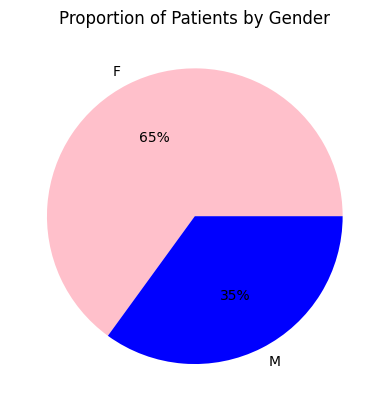

In [20]:
df.Gender.value_counts().plot(kind='pie', autopct='%1.0f%%',
                                colors = ['pink', 'blue'],
                                title='Proportion of Patients by Gender', ylabel='');

> As shown in the chart, 65% of appointments are for females, compared to 35% for males.

####  We will examine the distribution of attended and missed appointments by gender

In [21]:
df.groupby('Gender')['No_show'].value_counts()

Gender  No_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: count, dtype: int64

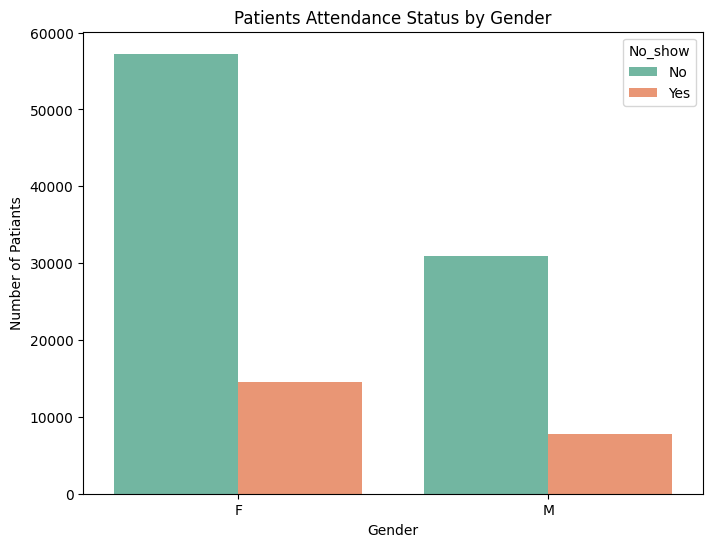

In [22]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df.Gender, hue=df.No_show, data=df, palette='Set2')
ax.set(xlabel='Gender', ylabel='Number of Patiants')
plt.title("Patients Attendance Status by Gender");
plt.show()

> As we can see in the chart, females are more likely to miss their appointments than males. This is mainly because females have a higher total number of appointments, which increases the likelihood of no-shows overall.

### Research Question 2  (Do older patients miss appointments more often?)

#### First, let's split the dataset into two groups: patients who missed their appointments and those who attended.

In [23]:
missed_appointments  = df.loc[df['No_show'] == 'Yes']
missed_appointments

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
6,F,23,Goiabeiras,0,0,0,0,0,0,Yes
7,F,39,Goiabeiras,0,0,0,0,0,0,Yes
11,M,29,Nova Palestina,0,0,0,0,0,1,Yes
17,F,40,Conquista,1,0,0,0,0,0,Yes
20,F,30,Nova Palestina,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...
110484,F,45,Barro Vermelho,0,0,0,0,0,0,Yes
110492,M,33,Maria Ortiz,0,1,0,0,0,0,Yes
110496,F,37,Maria Ortiz,0,1,0,0,0,0,Yes
110515,M,33,Maria Ortiz,0,1,0,0,0,0,Yes


In [24]:
attended_appointments  = df.loc[df['No_show'] == 'No']
attended_appointments 

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,Jardim Da Penha,0,1,0,0,0,0,No
1,M,56,Jardim Da Penha,0,0,0,0,0,0,No
2,F,62,Mata Da Praia,0,0,0,0,0,0,No
3,F,8,Pontal De Camburi,0,0,0,0,0,0,No
4,F,56,Jardim Da Penha,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110522,F,56,Maria Ortiz,0,0,0,0,0,1,No
110523,F,51,Maria Ortiz,0,0,0,0,0,1,No
110524,F,21,Maria Ortiz,0,0,0,0,0,1,No
110525,F,38,Maria Ortiz,0,0,0,0,0,1,No


#### Next, let's calculate the mean age for each group.

In [25]:
missed_appointments['Age'].mean()

34.31766656212196

In [26]:
attended_appointments['Age'].mean()

37.790504154999034

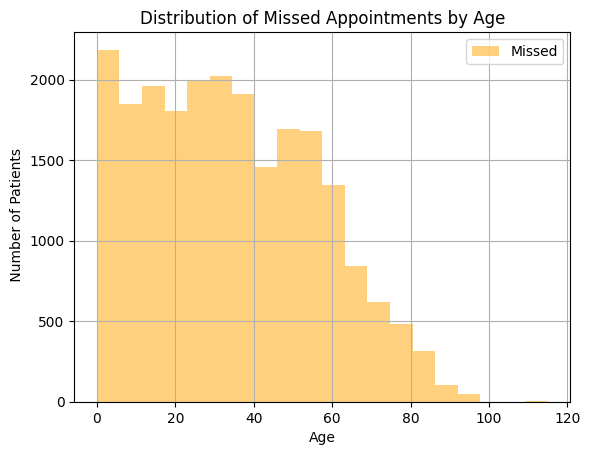

In [27]:
missed_appointments['Age'].hist(alpha=0.5, bins=20, label='Missed',color='orange')
plt.xlabel("Age")
plt.ylabel(" Number of Patients")
plt.title("Distribution of Missed Appointments by Age")
plt.legend();

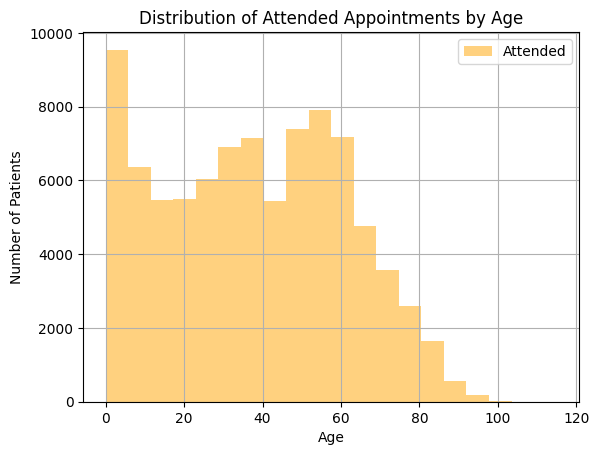

In [28]:
attended_appointments['Age'].hist(alpha=0.5, bins=20, label='Attended',color="orange")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.title("Distribution of Attended Appointments by Age")
plt.legend();

> The average age of patients who missed their appointments is 34 years, while the average age of those who attended is 37 years. This indicates that younger patients are slightly more likely to miss their appointments compared to older patients. This suggests that older patients are more careful about attending their appointments, while younger patients may have other commitments or factors that prevent them from attending regularly.




### Is there a relationship between age and gender that affects missed appointments? Are younger males or younger females more likely to miss their appointments?

In [29]:
missed_females= df.loc[(df['Gender']=='F') & (df['No_show']=='Yes')]
missed_males= df.loc[(df['Gender']=='M')&(df['No_show']=='Yes')]

#### Let’s calculate the mean age for males and females who missed their appointments

In [30]:
missed_females['Age'].mean()

36.162189941071674

In [31]:
missed_males['Age'].mean()

30.833009708737865

#### Let’s take a look at the age distribution of females who missed their appointments

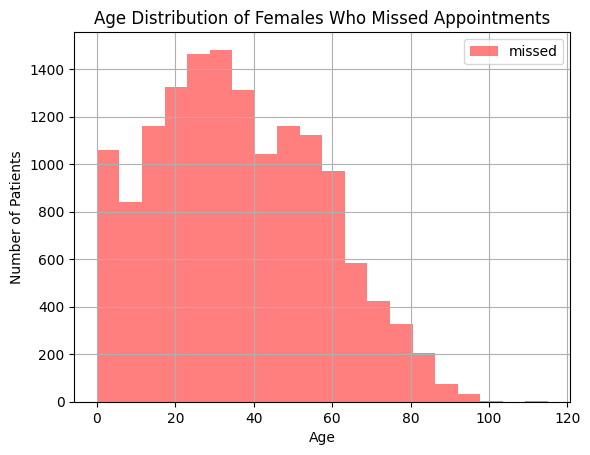

In [32]:
missed_females['Age'].hist(alpha=0.5, bins=20, label='missed',color="Red")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.title("Age Distribution of Females Who Missed Appointments")
plt.legend();

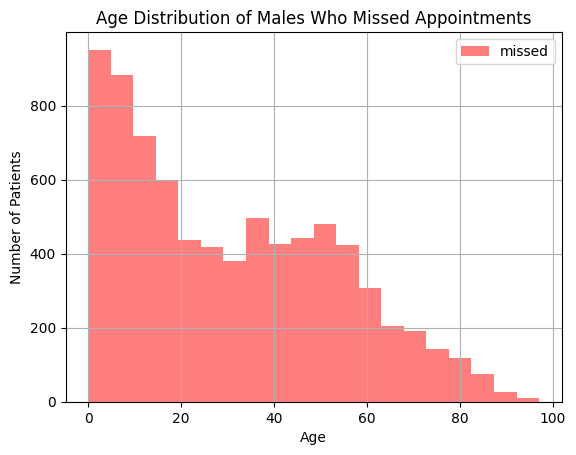

In [33]:
missed_males['Age'].hist(alpha=0.5, bins=20, label='missed',color="Red")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.title("Age Distribution of Males Who Missed Appointments")
plt.legend();

> The average age of males who missed appointments is 30 years, while for females it is 36 years. This indicates that younger males are more likely to miss appointments compared to females, who tend to miss appointments at a slightly older age. 


### Research Question 3  (Are missed appointments more common in certain neighborhoods?)

#### First, we will count the number of patients from each neighborhood

In [34]:
counts = df["Neighbourhood"].value_counts()
counts

Neighbourhood
Jardim Camburi                 7717
Maria Ortiz                    5805
Resistência                    4431
Jardim Da Penha                3877
Itararé                        3514
                               ... 
Ilha Do Boi                      35
Ilha Do Frade                    10
Aeroporto                         8
Ilhas Oceânicas De Trindade       2
Parque Industrial                 1
Name: count, Length: 81, dtype: int64

In [36]:
np.median(counts)

851.0

#### Because the number of appointments differs across neighborhoods, we will exclude neighborhoods with fewer than 500 appointments

In [38]:
neighborhoods = counts[counts > 500].index
df_filtered = df[df["Neighbourhood"].isin(neighborhoods)].copy()

df_filtered["Missed"] = df_filtered["No_show"].map({"No": 0, "Yes": 1})
df_filtered.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Missed
0,F,62,Jardim Da Penha,0,1,0,0,0,0,No,0
1,M,56,Jardim Da Penha,0,0,0,0,0,0,No,0
2,F,62,Mata Da Praia,0,0,0,0,0,0,No,0
4,F,56,Jardim Da Penha,0,1,1,0,0,0,No,0
5,F,76,República,0,1,0,0,0,0,No,0


#### Next, we calculate the average missed appointment rate for each neighborhood

In [39]:
average_missed_by_neighborhood = df_filtered.groupby("Neighbourhood")["Missed"].mean()
average_missed_by_neighborhood.sort_values(ascending=False)

Neighbourhood
Santos Dumont          0.289185
Santa Clara            0.264822
Itararé                0.262664
Jesus De Nazareth      0.243954
Ilha Do Príncipe       0.234775
Caratoíra              0.230409
Andorinhas             0.230327
Praia Do Suá           0.228261
Gurigica               0.225966
Bento Ferreira         0.224942
Parque Moscoso         0.223192
Maruípe                0.222923
Ilha Das Caieiras      0.219421
Fonte Grande           0.218475
Cruzamento             0.217454
São José               0.216490
Romão                  0.214092
Centro                 0.210858
São Pedro              0.210376
Maria Ortiz            0.209991
Santos Reis            0.204753
Resistência            0.204469
Santa Tereza           0.204204
Grande Vitória         0.202614
Monte Belo             0.201456
Bela Vista             0.201363
São Benedito           0.199444
Bonfim                 0.198341
São Cristóvão          0.197712
Santo André            0.197588
Estrelinha             0.1

> Missed rates vary across neighborhoods. Santos Dumont has the highest rate (28.9%), while Do Cabral has the lowest (15.7%). This suggests that the location of the appointment may influence patients likelihood of missing it.

### Research Question 4  (Does having a scholarship influence whether patients attend their appointments?)

In [40]:
df['Scholarship'].value_counts()

Scholarship
0    99665
1    10861
Name: count, dtype: int64

In [41]:
missed_appointments['Scholarship'].value_counts()

Scholarship
0    19741
1     2578
Name: count, dtype: int64

In [42]:
attended_appointments['Scholarship'].value_counts()

Scholarship
0    79924
1     8283
Name: count, dtype: int64

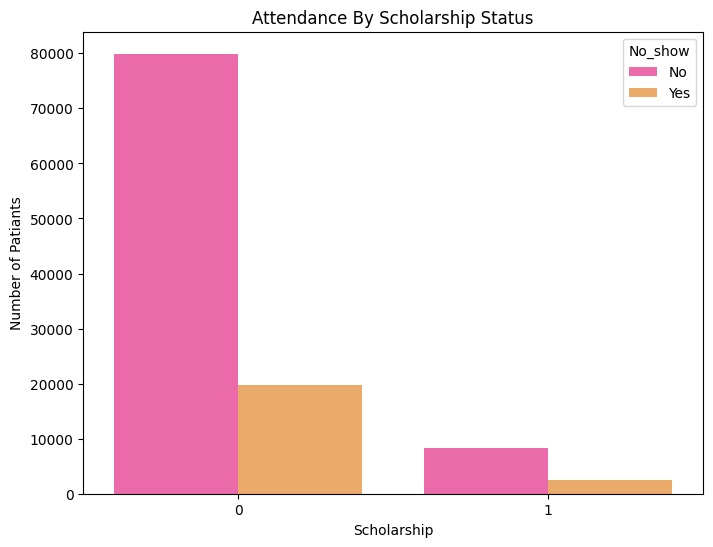

In [43]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df.Scholarship, hue=df.No_show, data=df, palette = 'spring')
ax.set(xlabel='Scholarship', ylabel='Number of Patiants')
plt.title('Attendance By Scholarship Status');
plt.show()

> As shown in the chart, most patients did not receive a scholarship. Among missed appointments, 2,578 patients had a scholarship, compared to 19,741 patients without one. Although patients with scholarships represent a smaller proportion of the total, they show a slightly lower absence rate compared to patients without scholarships.

### Research Question 5  (Are patients who consume alcohol more likely to miss their appointments?)

In [44]:
df['Alcoholism'].value_counts()

Alcoholism
0    107166
1      3360
Name: count, dtype: int64

In [45]:
df.groupby('Alcoholism')['No_show'].value_counts()

Alcoholism  No_show
0           No         85524
            Yes        21642
1           No          2683
            Yes          677
Name: count, dtype: int64

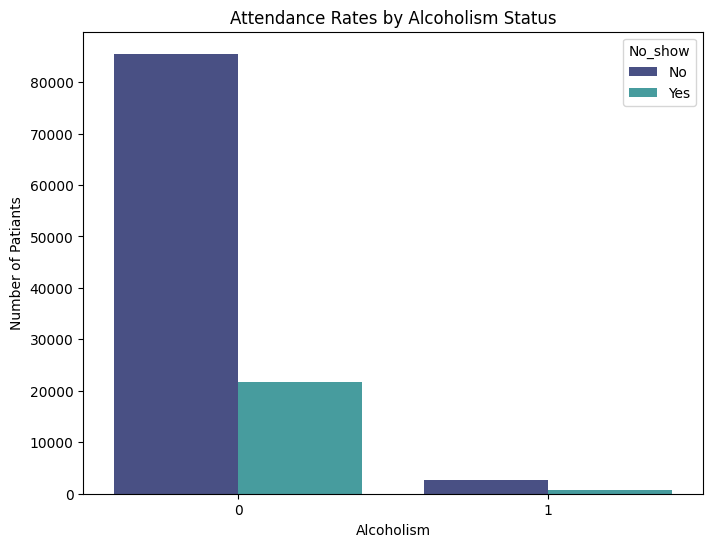

In [46]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df.Alcoholism, hue=df.No_show, data=df, palette = "mako")
ax.set(xlabel='Alcoholism', ylabel='Number of Patiants')
plt.title('Attendance Rates by Alcoholism Status');
plt.show()

> Although most patients are non-alcoholic, alcoholic patients generally attend their appointments regularly. 

### Research Question 6  (Does sending SMS messages affect whether patients attend their appointments?)

#### Let's show the total number of patients who received messages and those who did not.

In [47]:
df['SMS_received'].value_counts()

SMS_received
0    75044
1    35482
Name: count, dtype: int64

#### Then, we will examine the impact of receiving SMS messages on appointment attendance.

In [48]:
df.groupby('SMS_received')['No_show'].value_counts()

SMS_received  No_show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: count, dtype: int64

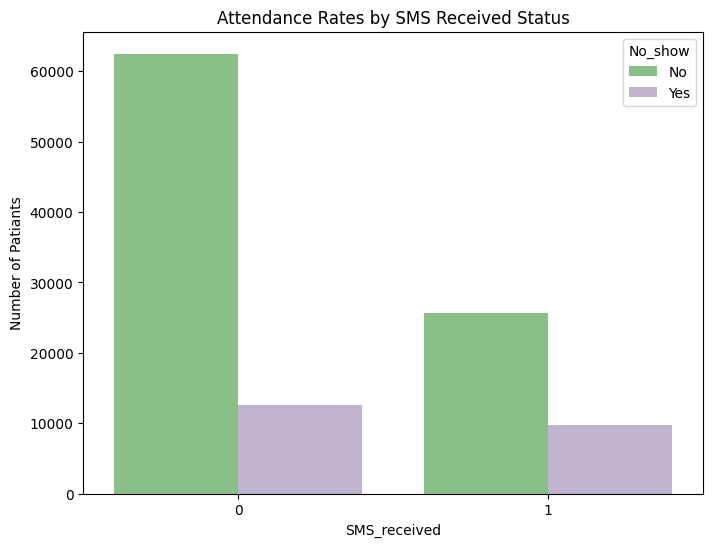

In [49]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df.SMS_received, hue=df.No_show, data=df, palette = "Accent")
ax.set(xlabel='SMS_received', ylabel='Number of Patiants')
plt.title('Attendance Rates by SMS Received Status');
plt.show()

> The chart shows that SMS messages help improve attendance, as more than half of the patients who received messages showed up. However, the total number of patients attending without receiving SMS messages was much higher, likely because this group is larger overall.

### Research Question 7  (Do patients with chronic diseases miss their appointments more?)

### 1- Hypertension

In [50]:
df['Hypertension'].value_counts()

Hypertension
0    88725
1    21801
Name: count, dtype: int64

In [51]:
df.groupby('Hypertension')['No_show'].value_counts()

Hypertension  No_show
0             No         70178
              Yes        18547
1             No         18029
              Yes         3772
Name: count, dtype: int64

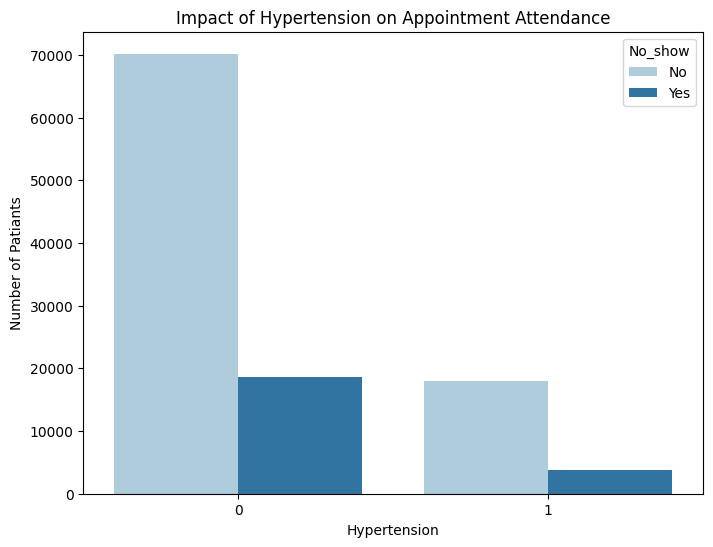

In [52]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df.Hypertension, hue=df.No_show, data=df, palette = "Paired")
ax.set(xlabel='Hypertension', ylabel='Number of Patiants')
plt.title('Impact of Hypertension on Appointment Attendance');
plt.show()

> As shown in the chart, patients with hypertension actually have a slightly lower missed appointment rate. Therefore, hypertension does have an effect on missed appointments, but it appears to be associated with better attendance rather than worse.

### 2- Diabetes

In [53]:
df['Diabetes'].value_counts()

Diabetes
0    102583
1      7943
Name: count, dtype: int64

In [54]:
df.groupby('Diabetes')['No_show'].value_counts()

Diabetes  No_show
0         No         81694
          Yes        20889
1         No          6513
          Yes         1430
Name: count, dtype: int64

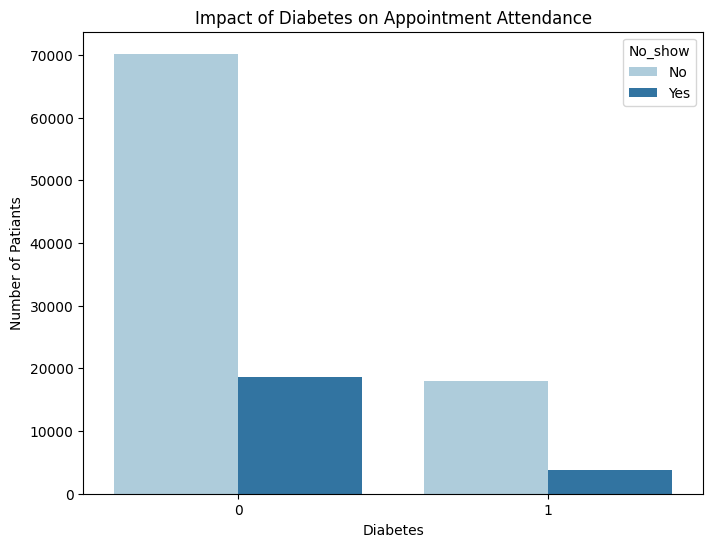

In [55]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df.Hypertension, hue=df.No_show, data=df, palette = "Paired")
ax.set(xlabel='Diabetes', ylabel='Number of Patiants')
plt.title('Impact of Diabetes on Appointment Attendance');
plt.show()

> As shown in the graph, most patients with diabetes are generally eager to attend their appointments.

### 3- Handicap

In [56]:
df['Handicap'].value_counts()

Handicap
0    108285
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

In [57]:
df.groupby('Handicap')['No_show'].value_counts()

Handicap  No_show
0         No         86373
          Yes        21912
1         No          1676
          Yes          366
2         No           146
          Yes           37
3         No            10
          Yes            3
4         No             2
          Yes            1
Name: count, dtype: int64

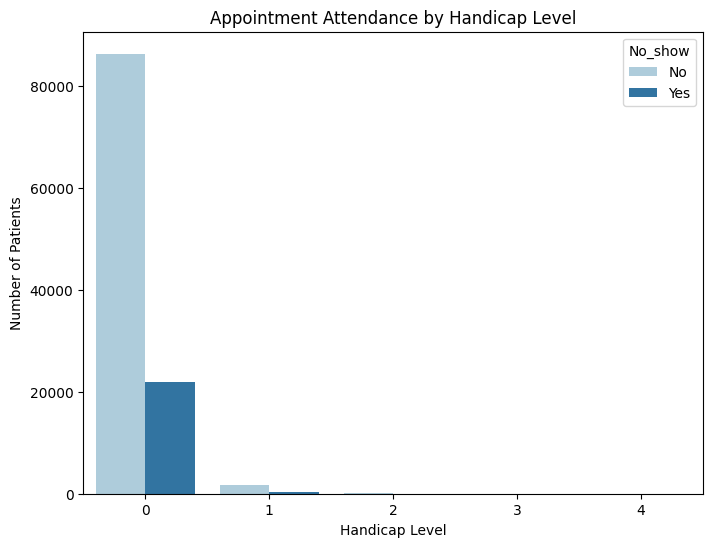

In [58]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df.Handicap, hue=df.No_show, data=df, palette="Paired")
ax.set(xlabel='Handicap Level', ylabel='Number of Patients')
plt.title('Appointment Attendance by Handicap Level')
plt.show()

> Most patients have no handicap, with the majority attending their appointments. Although patients with a handicap are fewer, they generally maintain good attendance.

<a id='conclusions'></a>
## Conclusions

> In conclusion, after analyzing the dataset, several clear patterns appear. Older patients are generally more likely to attend their appointments than younger patients. Sending SMS messages has a positive effect on attendance. Patients with chronic conditions, such as hypertension or diabetes, tend to show up more consistently. Additionally, attendance rates vary across neighborhoods, suggesting that neighborhoods may influence appointment attendance.Finally, younger male patients are more likely to miss their appointments compared to younger female patients.



<a id='conclusions'></a>
## Limitations

> This dataset would have been better if it were larger and more balanced, as the number of attended appointments is much higher than missed ones, which may affect the accuracy of the analysis.


> This dataset would have been better if it included additional social factors, such as patient marital status, work status, education level, and place of residence, which may influence appointment attendance.

